In [3]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sck

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

from sklearn.tree import plot_tree

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_auc_score, roc_curve

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Trabajo Final**
#### Miembros: David Temprano, Jimena Miniño, Miguel Sanz y Alejandra Llord

# Dataset escogido: Campus Recruitment

Este dataset consiste en información sobre el posicionamiento del estudiante en el campus. Incluye porcentajes de calificaciones de secundaria, bachillerato y especialización, así también, variables como la experiencia previa de trabajo y el salario ofrecido por las corporaciones a los estudiantes.

Consta de 15 variables con 216 datos, de estas el id del estudiante y dos muy importantes para las conclusiones a las que llegaremos, siendo el salario y el estado, refiriéndose al estado de colocación del estudiante en una empresa:

sl_no: Número de serie único.

gender: Género del estudiante (M: Masculino, F: Femenino).

ssc_p: Porcentaje en la educación secundaria (10º grado).

ssc_b: Junta de educación de la educación secundaria.

hsc_p: Porcentaje en la educación superior secundaria (12º grado).

hsc_b: Junta de educación de la educación superior secundaria. Indica la junta de educación de la cual el estudiante tomó su examen de educación superior secundaria, con opciones como "Central" u "Otros".

hsc_s: Especialización en la educación superior secundaria.

degree_p: Porcentaje en el grado universitario.

degree_t: Tipo de grado universitario.

workex: Experiencia laboral (Sí/No).

etest_p: Porcentaje en la prueba de empleabilidad.

specialisation: Especialización de MBA.

mba_p: Porcentaje en el programa de MBA.

status: Estado de colocación (Placed/Not Placed).

salary: Salario ofrecido a los candidatos colocados

A continuación se describirán las hipótesis realizadas previamente al análisis del dataset y que serán validadas o refutadas utilizando tres diferentes algoritmos correspondientes vistos en la asignatura Aprendizaje Estadístico y Data Mining.


Link del dataset:  https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

## Hipótesis:
#### 1. Veremos qué grados y especializaciones están relacionadas entre sí y cómo influencian en la situación laboral. Utilizaremos el algoritmo a Priori
#### 2. Se clasifica a los estudiantes según su colocación en empresas. Utilizaremos árboles de decisión y Gini
#### 3. Estudiaremos si el grado y especialización de un estudiante influyen en que sea colocado o no. Utilizaremos regresión logística.
#### 4. Comprobaremos como afectan los estudios académicos y universitarios a los salarios. Utilizaremos Clúster

## Análisis inicial del dataset

In [4]:
# Cargamos el archivo CSV
datos = pd.read_csv('Placement_Data_Full_Class.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Verificar si hay valores faltantes en el DataFrame
missing_values = datos.isna().sum()

# Mostrar el número de NA´s en cada columna
print("Números de NAs por columna:")
print(missing_values)


Números de NAs por columna:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Podemos ver que la variable salario tiene 67 observaciones vacias por lo que haremos la media de las que tenemos y asumiremos que ese es el salario de aquellos que no tienen.

In [6]:
# Calcula la media de la columna 'salary'
salary_mean = datos['salary'].mean()

# Rellena los valores faltantes en 'salary' con la media calculada
datos['salary'] = datos['salary'].fillna(salary_mean)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


## Gráficos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


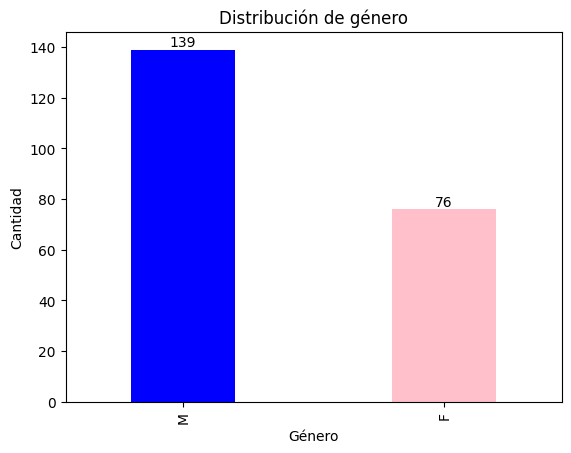

In [8]:
conteo_genero = datos['gender'].value_counts()

# Gráfico de barras
conteo_genero.plot(kind='bar', width=0.4, color=['blue', 'pink'])

# Añadimos etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de género')

# Mostramos la cantidad exacta encima de las barras
for index, value in enumerate(conteo_genero):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Mostramos el gráfico
plt.show()

El primer gráfico que hemos hecho compara la cantidad de estudiantes que hay masculinos frente a los femeninos y podemos ver que el género masculino predomina por casi el doble que el femenino. El hecho de que haya más hombres que mujeres en la base de datos puede indicar un sesgo en la selección de los estudiantes incluidos en el estudio ya que, por lo general, no hay tanta diferencia en la involucración en los estudios en cuanto a género.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


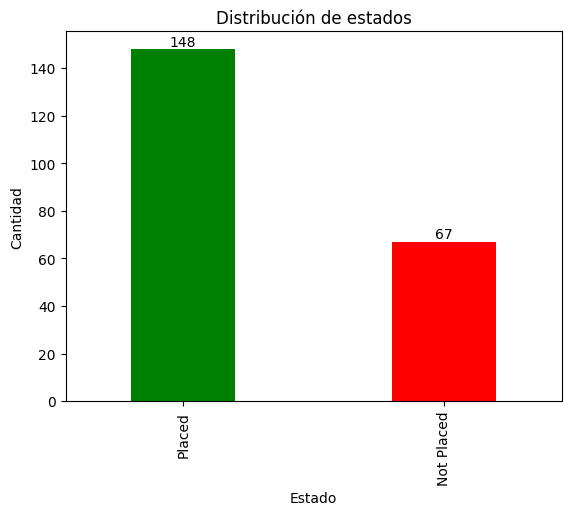

In [9]:
conteo_status = datos['status'].value_counts()

# Gráfico de barras
conteo_status.plot(kind='bar', width=0.4, color=['green', 'red'])

# Añadimos etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Distribución de estados')

# Mostramos la cantidad exacta encima de las barras
for index, value in enumerate(conteo_status):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Mostramos el gráfico
plt.show()

Placed (Colocado): Indica que el estudiante ha sido posicionado en una empresa después de completar su educación en el campus. Esto significa que el estudiante ha asegurado un trabajo y probablemente haya recibido una oferta de empleo de una empresa.

Not Placed (No Colocado): Indica que el estudiante no ha sido posicionado en una empresa después de completar su educación en el campus.

Estos resultados se pueden deber a que a lo mejor, de esos estudiantes que no han sido colocados, algunos hayan preferido seguir invirtiendo tiempo en su educación o no quieran ponerse a trabajar nada más salir por la razón que sea. Aún así también se puede interpretar que sus estudios no les han permitido ser elegido por o colocado en ninguna empresa. Cabe fijarse en la gran diferencia que hay entre estudiantes colocados frente a los no colocados, es decir, por lo general la mayoría de los estudiantes serán colocados tras finalizar sus estudios.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


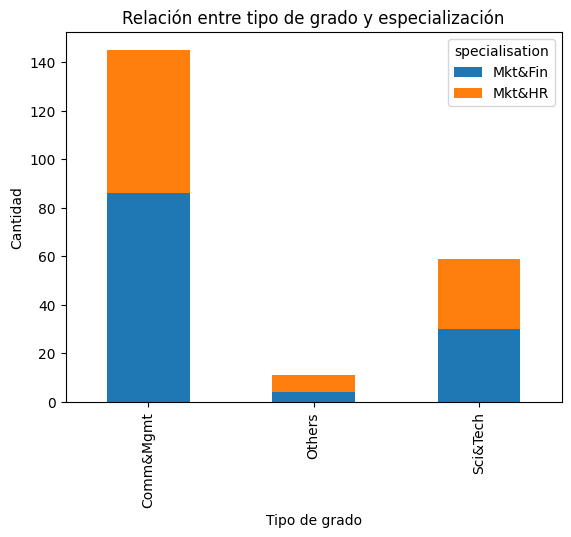

In [10]:
# Contamos los valores de la combinación de 'degree_t' y 'specialisation'
conteo_combinaciones = datos.groupby(['degree_t', 'specialisation']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
conteo_combinaciones.plot(kind='bar', stacked=True)

# Añadimos etiquetas y título
plt.xlabel('Tipo de grado')
plt.ylabel('Cantidad')
plt.title('Relación entre tipo de grado y especialización')

# Mostramos el gráfico
plt.show()


En este último gráfico podemos ver la cantidad de especialización entre grados, dividiéndolos en tres grupos, Comm&Mgmt (empresariales), Sci&Tech (ciencias) y Others. Podemos ver que las carreras de "empresariales" tienen mayor de cantidad de alumnos y por consecuente mayores niveles de especialización comparado con los grados de ciencias, que a pesar de tener altos niveles de especialización, no alcanzan a los de empresariales. En cuanto a los demás grados, los niveles de estudiantes matriculados en estos son muy bajos, y van a la par que los niveles de especialización.

# 1. Apriori
Generamos las reglas de asociación que indican que combinaciones de atributos, tipo de grado y especialización, están relacionadas entre sí y como influyen en la situación laboral de los estudiantes.

In [11]:
# Cargamos el conjunto de datos
placement_data1 = pd.read_csv('Placement_Data_Full_Class.csv')

# Filtramos las columnas relevantes
datos_relevantes = placement_data1[['degree_t', 'specialisation', 'status']]

# Variables categóricas
datos_codificados = pd.get_dummies(datos_relevantes)

# Generamos itemsets frecuentes utilizando Apriori
itemsets_frecuentes = apriori(datos_codificados, min_support=0.4, use_colnames=True)

# Generamos reglas de asociación
reglas_asociacion = association_rules(itemsets_frecuentes, metric="lift", min_threshold=1.01)

# Mostramos las reglas de asociación
print("\nReglas de Asociación:")
print(reglas_asociacion)


Reglas de Asociación:
                antecedents               consequents  antecedent support  \
0      (degree_t_Comm&Mgmt)  (specialisation_Mkt&Fin)            0.674419   
1  (specialisation_Mkt&Fin)      (degree_t_Comm&Mgmt)            0.558140   
2           (status_Placed)      (degree_t_Comm&Mgmt)            0.688372   
3      (degree_t_Comm&Mgmt)           (status_Placed)            0.674419   
4           (status_Placed)  (specialisation_Mkt&Fin)            0.688372   
5  (specialisation_Mkt&Fin)           (status_Placed)            0.558140   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.558140  0.400000    0.593103  1.062644  0.023580    1.085928   
1            0.674419  0.400000    0.716667  1.062644  0.023580    1.149111   
2            0.674419  0.474419    0.689189  1.021901  0.010168    1.047523   
3            0.688372  0.474419    0.703448  1.021901  0.010168    1.050838   
4            0.558140  0.441860    0.64189

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Utilizamos la métrica lift para analizar las reglas. Al ser todas las reglas mayores de 1, nos esta indicando una asociación positiva entre los antecedentes y los consecuentes.

In [12]:
# Calculamos la confianza de cada regla de asociación
reglas_asociacion['confidence'] = reglas_asociacion['support'] / reglas_asociacion['antecedent support']

# Ordenamos las reglas de asociación por confianza descendente
reglas_ordenadas = reglas_asociacion.sort_values(by='confidence', ascending=False)

# Mostramos las reglas de asociación con su confianza
print("Todas las posibles reglas con su confianza:")
for idx, row in reglas_ordenadas.iterrows():
    print("Regla: {} --> {}; Confianza: {:.2f}".format(
        set(row['antecedents']),
        set(row['consequents']),
        row['confidence']))

Todas las posibles reglas con su confianza:
Regla: {'specialisation_Mkt&Fin'} --> {'status_Placed'}; Confianza: 0.79
Regla: {'specialisation_Mkt&Fin'} --> {'degree_t_Comm&Mgmt'}; Confianza: 0.72
Regla: {'degree_t_Comm&Mgmt'} --> {'status_Placed'}; Confianza: 0.70
Regla: {'status_Placed'} --> {'degree_t_Comm&Mgmt'}; Confianza: 0.69
Regla: {'status_Placed'} --> {'specialisation_Mkt&Fin'}; Confianza: 0.64
Regla: {'degree_t_Comm&Mgmt'} --> {'specialisation_Mkt&Fin'}; Confianza: 0.59


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La primera regla con una confianza del 79%, nos sugiere que los estudiantes con especialización en "Mkt&Fin" tienen una alta probabilidad de estar trabajando. La quinta regla con una confianza del 64% nos indica lo mismo que la anterior, pero con menos confianza.

La segunda regla con una confianza de 72%, nos indica que hay una alta probabilidad de que los estudiantes con especialización en "Mkt&Fin" también tengan un grado en "Comm&Mgmt". Esta relación es importante para entender la trayectoria académica de los estudiantes. La sexta regla con una confianza del 59% nos indica lo mismo que la anterior, pero con menos confianza.

La tercera y la cuarta regla con confianzas de 69% y 64% respectivamente, nos sugieren que los estudiantes con un tipo de grado en "Comm&Mgmt" tienen una alta probabilidad de estar trabajando, y viceversa.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


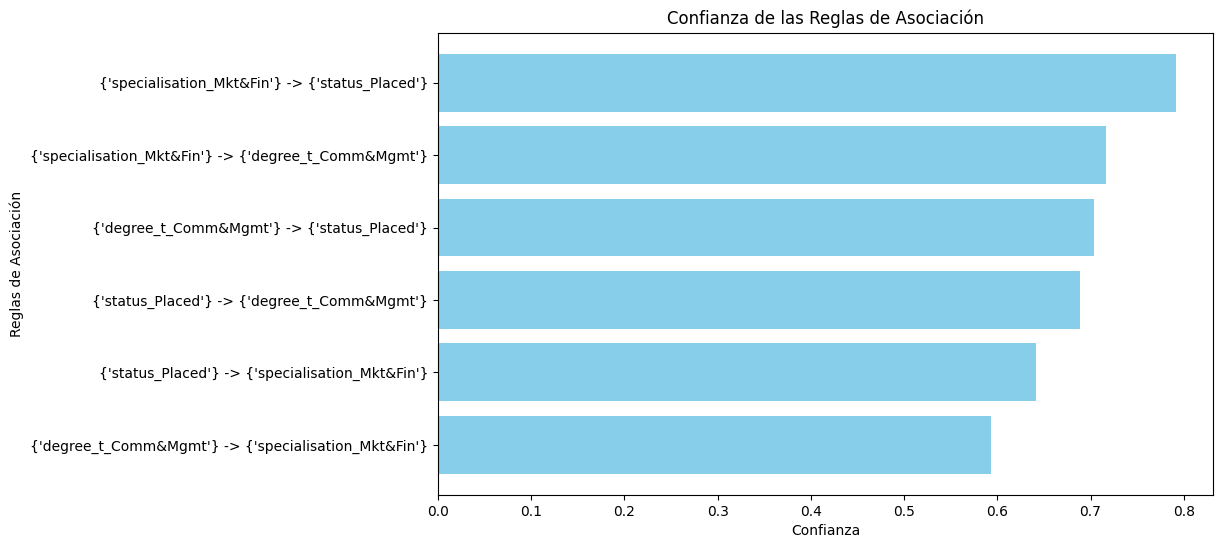

In [13]:
# Obtenemos las reglas de asociación y sus confianzas
reglas = [f"{set(row['antecedents'])} -> {set(row['consequents'])}" for idx, row in reglas_ordenadas.iterrows()]
confianzas = reglas_ordenadas['confidence']

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(reglas, confianzas, color='skyblue')
plt.xlabel('Confianza')
plt.ylabel('Reglas de Asociación')
plt.title('Confianza de las Reglas de Asociación')
plt.gca().invert_yaxis()
plt.show()

Las anteriores reglas, nos indican que nuestra hipótesis es verdadera porque los estudiantes con el grado de "Comm&Mgmt" y la especialización de "Mkt&Fin" tienen un puesto laboral.

Investigamos cómo el género y el tipo de grado afectan el salario mediante reglas de asociación.

In [14]:
# Cargamos el conjunto de datos
placement_data1_1 = pd.read_csv('Placement_Data_Full_Class.csv')

# Discretizamos la columna de salario
rangos_salario = [0, 200000, 400000, 600000, 800000, float('inf')]
etiquetas_salario = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k+']
placement_data1_1['rango_salario'] = pd.cut(placement_data1_1['salary'], bins=rangos_salario, labels=etiquetas_salario)

# Reemplazar NaN por 0 en la columna 'salary'
placement_data1_1['salary'].fillna(0, inplace=True)

# Preprocesamiento de datos
datos_codificados = pd.get_dummies(placement_data1_1[['gender', 'degree_t', 'rango_salario']], columns=['gender', 'degree_t', 'rango_salario'])

# Aplicamos el algoritmo Apriori
itemsets_frecuentes = apriori(datos_codificados, min_support=0.3, use_colnames=True)

# Generamos reglas de asociación
reglas = association_rules(itemsets_frecuentes, metric="support", min_threshold=0.4)

# Mostramos las reglas de asociación
print("Reglas de asociación:")
print(reglas)

Reglas de asociación:
                 antecedents                consequents  antecedent support  \
0                 (gender_M)       (degree_t_Comm&Mgmt)            0.646512   
1       (degree_t_Comm&Mgmt)                 (gender_M)            0.674419   
2                 (gender_M)  (rango_salario_200k-400k)            0.646512   
3  (rango_salario_200k-400k)                 (gender_M)            0.613953   
4  (rango_salario_200k-400k)       (degree_t_Comm&Mgmt)            0.613953   
5       (degree_t_Comm&Mgmt)  (rango_salario_200k-400k)            0.674419   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.674419  0.427907    0.661871  0.981394 -0.008112    0.962890   
1            0.646512  0.427907    0.634483  0.981394 -0.008112    0.967091   
2            0.613953  0.413953    0.640288  1.042893  0.017025    1.073209   
3            0.646512  0.413953    0.674242  1.042893  0.017025    1.085127   
4            0.674419  0.4325

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Utilizamos la métrica support para analizar las reglas.

In [15]:
# Calculamos la confianza de cada regla de asociación
reglas['confidence'] = reglas['support'] / reglas['antecedent support']

# Ordenamos las reglas de asociación por confianza descendente
reglas_ordenadas = reglas.sort_values(by='confidence', ascending=False)

# Mostramos las reglas de asociación con su confianza
print("Todas las posibles reglas con su confianza:")
for idx, row in reglas_ordenadas.iterrows():
    print("Regla: {} --> {}; Confianza: {:.2f}".format(
        set(row['antecedents']),
        set(row['consequents']),
        row['confidence']))

Todas las posibles reglas con su confianza:
Regla: {'rango_salario_200k-400k'} --> {'degree_t_Comm&Mgmt'}; Confianza: 0.70
Regla: {'rango_salario_200k-400k'} --> {'gender_M'}; Confianza: 0.67
Regla: {'gender_M'} --> {'degree_t_Comm&Mgmt'}; Confianza: 0.66
Regla: {'degree_t_Comm&Mgmt'} --> {'rango_salario_200k-400k'}; Confianza: 0.64
Regla: {'gender_M'} --> {'rango_salario_200k-400k'}; Confianza: 0.64
Regla: {'degree_t_Comm&Mgmt'} --> {'gender_M'}; Confianza: 0.63


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La primera regla con una confianza del 70%, nos sugiere que un salario entre 200k y 400k tienen una alta probabilidad de tener un grado en "Comm&Mgmt". La cuarta regla con una confianza del 64%, nos indica lo mismo que la anterior, pero con menos confianza.

La segunda regla con una confianza del 67%, nos indica que un salario entre 200k y 400k tienen una alta probabilidad de ser hombres. La quinta regla con una confianza del 64%, nos indica lo mismo que la anterior, pero con menos confianza.

La tercera regla con una confianza del 66%, nos sugiere que un hombre tiene una alta probabilidad de tener un grado en "Comm&Mgmt". La sexta regla con una confianza del 63%, nos indica lo mismo que la anterior, pero con menos confianza.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


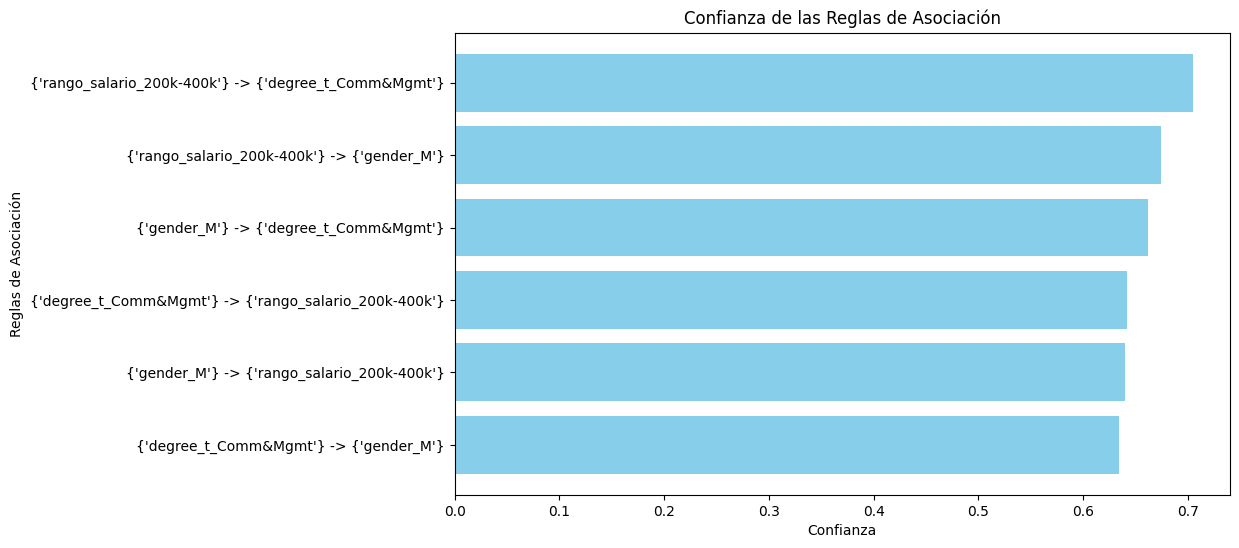

In [16]:
# Obtenemos las reglas de asociación y sus confianzas
reglas = [f"{set(row['antecedents'])} -> {set(row['consequents'])}" for idx, row in reglas_ordenadas.iterrows()]
confianzas = reglas_ordenadas['confidence']

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(reglas, confianzas, color='skyblue')
plt.xlabel('Confianza')
plt.ylabel('Reglas de Asociación')
plt.title('Confianza de las Reglas de Asociación')
plt.gca().invert_yaxis()
plt.show()

Como observamos en las reglas, nuestra hipótesis queda refutada ya que el salario final de los hombres con estudios relacionados con "Comm&Mgmt" es mayor que los de "Sci&Tech".

# 2. Árbol de decisión

Este estudio utiliza un modelo de árbol de decisión para evaluar la 2 hipótesis de que el estado laboral y el salario de los estudiantes están mayormente determinados por sus calificaciones en secundaria, bachillerato y universidad, además de su experiencia laboral previa. El árbol de decisión se implementa usando tanto el criterio de impureza de Gini como el de entropía para comparar su eficacia en la clasificación de los estudiantes según si consiguieron o no una colocación laboral.

### Preprocesamiento del dataset
Se importa el dataset y se escogen las variables con las que probaremos que el modelo clasifica bien el estado laboral(status), creando un subconjunto con las variables de entrada y otro con la variable de salida status.

Las variables seleccionadas para el modelo incluyen calificaciones de secundaria (ssc_p), bachillerato (hsc_p), universidad (degree_p), prueba de empleabilidad (etest_p), programa de MBA (mba_p), y experiencia laboral previa (workex).

La variable workex es categórica y se codifica como 0 para 'No' y 1 para 'Sí', lo que permite su uso en el modelo de árbol de decisión.

Posteriormente, dividimos el dataset en un subconjunto de entrenamiento y pruebas en una proporción para entrenar y probar el modelo

In [17]:
# Seleccionamos variables de las que creemos que depende el estado de colocación
features = ['ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p']
X = placement_data2[features]
y = placement_data2['status']

# Codificamos la única variable categórica
X['workex'] = X['workex'].map({'Yes': 1, 'No': 0})

# Dividimos el dataset en subconjuntos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-4f43d9ca3f5b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workex'] = X['workex'].map({'Yes': 1, 'No': 0})


### **Clasificador Entropía**

Procedemos a entrenar el modelo de clasificación utilizando el algoritmo de Gini y de la entropía. Una vez entrenado predecimos los valores según la clasificación realizada, ahora con el conjunto de prueba, validando según las métricas establecidas la precisión del modelo al clasificar el status del estudiante según las variables escogidas.

In [18]:
# Clasificador de árbol de decisión utilizando entropía
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=40)
dt_classifier_entropy.fit(X_train, y_train)
y_pred_dt_entropy = dt_classifier_entropy.predict(X_test)
accuracy_dt_entropy = accuracy_score(y_test, y_pred_dt_entropy)
print("Precisión del clasificador de árbol de decisión (entropía):", round(accuracy_dt_entropy, 4), "------Error:", round(1 - accuracy_dt_entropy, 4))
print("\n")


Precisión del clasificador de árbol de decisión (entropía): 0.814 ------Error: 0.186




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La precisión obtenida con el criterio de la entropía es del 81.4%, mostrando un grado de error del 18.6%. Esto indica que el modelo es bastante eficiente en predecir los estados de colocación de los estudiantes basado en las variables seleccionadas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


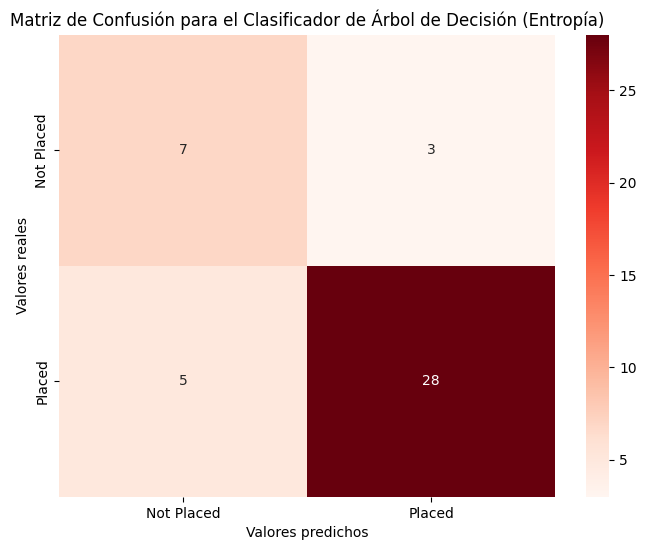

In [19]:
# Creamos matriz de confusión para entropía
conf_matrix_entropy = confusion_matrix(y_test, y_pred_dt_entropy, labels=['Not Placed', 'Placed'])

# Configuramos y graficamos la matriz para entropía
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_entropy, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión para el Clasificador de Árbol de Decisión (Entropía)')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()


La matriz de confusión es una matriz que muestra el rendimiento del modelo de clasificación en términos de errores y aciertos. Encontramos la interpretación en forma de porcentaje:

MATRIX CONFUSION:

(TN FP)

(FN TP)

Verdadero Positivo (TP): Estos son los casos en los que el modelo predijo correctamente que el estudiante fue colocado ("Placed"). Representan el porcentaje de muestras que realmente fueron colocadas y que el modelo clasificó correctamente como "Placed". 28

Verdadero Negativo (TN): Estos son los casos en los que el modelo predijo correctamente que el estudiante no fue colocado ("Not Placed").Representan el porcentaje de muestras que realmente no fueron colocadas y que el modelo clasificó correctamente como "Not Placed". 7

Falso Positivo (FP): Estos son los casos en los que el modelo predijo incorrectamente que el estudiante fue colocado ("Placed"), cuando en realidad no lo fue ("Not Placed").Representan el porcentaje de muestras que realmente no fueron colocadas pero que el modelo clasificó incorrectamente como "Placed". 3

Falso Negativo (FN): Estos son los casos en los que el modelo predijo incorrectamente que el estudiante no fue colocado ("Not Placed"), cuando en realidad lo fue ("Placed"). Representan el porcentaje de muestras que realmente fueron colocadas pero que el modelo clasificó incorrectamente como "Not Placed". 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


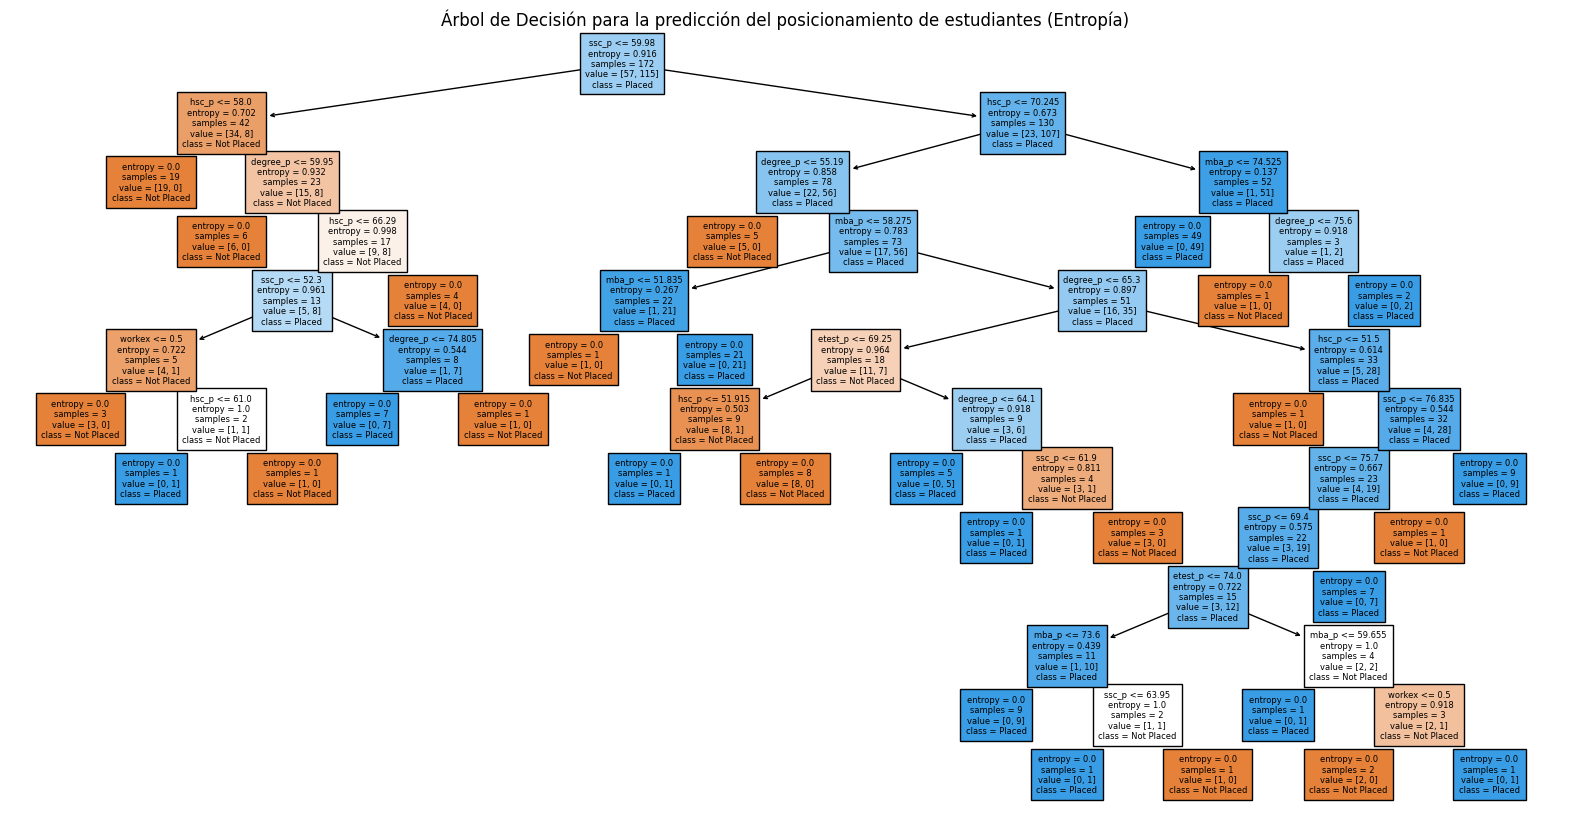

In [20]:
# Obteniendo el modelo del árbol de decisión con entropía
decision_tree_model_entropy = dt_classifier_entropy

# Graficamos el árbol de decisión con entropía
plt.figure(figsize=(20,10))
tree_plot_entropy = plot_tree(decision_tree_model_entropy,
                              feature_names=features,
                              class_names=['Not Placed', 'Placed'],
                              filled=True,
                              fontsize=6)
plt.title('Árbol de Decisión para la predicción del posicionamiento de estudiantes (Entropía)')
plt.show()


Observamos que las calificaciones en secundaria, bachillerato y universidad parecen jugar roles cruciales en la determinación del estado de colocación de los estudiantes. Por ejemplo, se observa que en varios nodos del árbol, umbrales específicos en ssc_p, hsc_p y degree_p son decisivos para clasificar a los estudiantes, ejemplos como en la primera regla:

(ssc_p<=59.98)-> (hsc_p<=58)-> notplaced la cual nos indica que si un individuo no supera esas notas en secundaria y bachillerato la determinación de su estado laboral será not placed.

Por ello consideramos que las calificaciones en secundaria, bachillerato y la universidad, sí que influyen a la hora de determinar el estado laboral. La experiencia laboral previa también parece influir significativamente. En algunos nodos, la presencia o ausencia de experiencia laboral cambia la clasificación del individuo de 'Not placed' a 'Placed'.(Por ejemplo la regla posicionada abajo a la derecha del arbol, observamos que acaba como: workex<=0.5 y en función de esta se clasifica como un estado u otro).

La alta precisión del modelo nos da a entender que las variables elegidas son indicadores fuertes del estado de colocación, luego aceptamos nuestra hipótesis inicial. Sin embargo, un error del 18.6% sugiere que puede haber otros factores no considerados en el modelo que también podrían influir en el resultado de la colocación.

### **Clasificador Gini**

Pese a ya haber demostrado la hipótesis planteada, a continuación estudiaremos si nuestros datos se ajustan mejor al algoritmo de clasificación por Entropía o por Gini.

In [21]:
# Clasificador de árbol de decisión utilizando Gini
dt_classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=40)
dt_classifier_gini.fit(X_train, y_train)
y_pred_dt_gini = dt_classifier_gini.predict(X_test)
accuracy_dt_gini = accuracy_score(y_test, y_pred_dt_gini)

print("Precisión del clasificador de árbol de decisión (Gini):", round(accuracy_dt_gini, 4), "------Error:", round(1 - accuracy_dt_gini, 4))
print("\n")

Precisión del clasificador de árbol de decisión (Gini): 0.907 ------Error: 0.093




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Observamos que el clasificador Gini se ajusta mejor a nuestros datos aportando una precisión del 90.07%.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


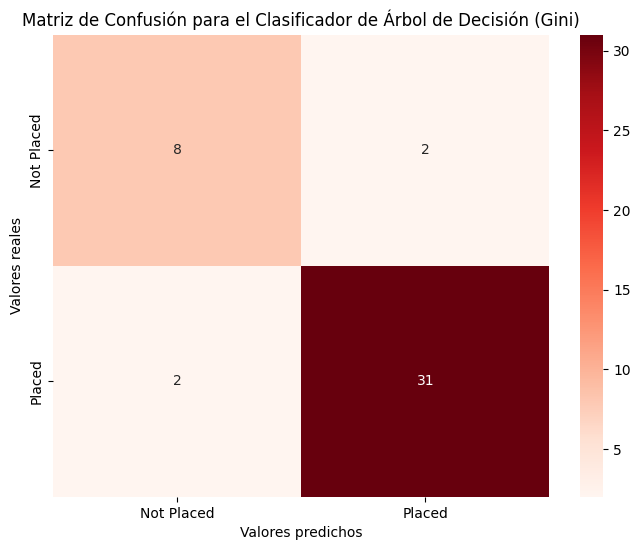

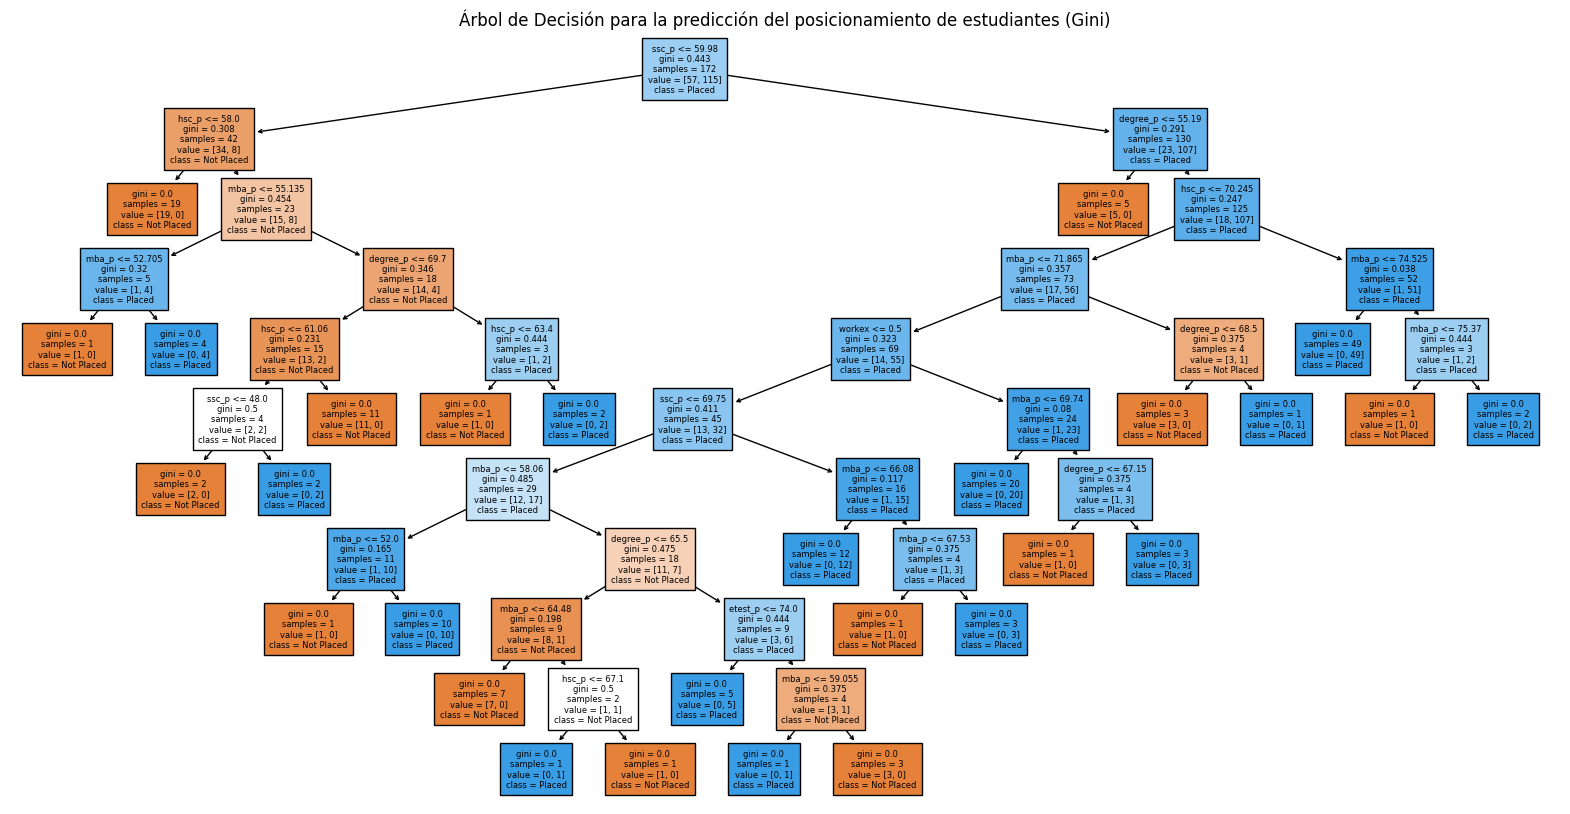

In [22]:
# Creamos matriz de confusión para Gini
conf_matrix_gini = confusion_matrix(y_test, y_pred_dt_gini, labels=['Not Placed', 'Placed'])

# Configuramos y graficamos la matriz para Gini
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gini, annot=True, fmt="d", cmap="Reds", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión para el Clasificador de Árbol de Decisión (Gini)')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Obteniendo el modelo del árbol de decisión con Gini
decision_tree_model_gini = dt_classifier_gini

# Graficamos el árbol de decisión con Gini
plt.figure(figsize=(20,10))
tree_plot_gini = plot_tree(decision_tree_model_gini,
                           feature_names=features,
                           class_names=['Not Placed', 'Placed'],
                           filled=True,
                           fontsize=6)
plt.title('Árbol de Decisión para la predicción del posicionamiento de estudiantes (Gini)')
plt.show()


En definitiva, como resultado de todo el análisis, junto con el modelo generado y gráficas realizadas, llegamos a la conclusión que la hipótesis se cumple en gran medida, de manera que, podemos decir que el status del estudiante depende en su gran mayoría de las variables relacionadas con las calificaciones, experiencia de trabajo previa y el MBA.

# 3. Regresión Logística

El objetivo principal de el siguiente estudio es construir y evaluar un modelo de regresión logística que pueda predecir con precisión si un estudiante será colocado o no (denotados como 'Placed' y 'Not Placed', respectivamente). Utilizaremos un conjunto de datos que incluye diversas variables predictoras sobre los estudiantes y su estatus de colocación como variable de respuesta.. Dado que vamos a predecir una variable binaria, nos interesa especialmente este tipo de regresión.

El objetivo principal de este análisis es evaluar de nuevo la hipótesis 2 de que factores como las calificaciones en secundaria, bachillerato y universidad, así como la experiencia laboral previa, son determinantes significativos en la probabilidad de que un estudiante obtenga una oferta de empleo. En este caso vamos a estudiarlo utilizando regresión logística.

In [23]:
# Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred = logistic_model.predict(X_test)
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Obtener los coeficientes del modelo
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_

# Crear un dataframe para ver las variables y sus coeficientes
coeff_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coefficients,
    'Odds Ratio': np.exp(coefficients)
})
coeff_df = coeff_df.sort_values(by='Odds Ratio', ascending=False)
print(coeff_df)
print("\n")
print("Precisión de la regresión logística:", round(accuracy, 4), "------Error:", round(1 - accuracy, 4))
print("\n")

   Variable  Coeficiente  Odds Ratio
3    workex     1.835582    6.268783
0     ssc_p     0.181315    1.198793
2  degree_p     0.161371    1.175121
1     hsc_p     0.110815    1.117188
4   etest_p    -0.006895    0.993129
5     mba_p    -0.203807    0.815619


Precisión de la regresión logística: 0.907 ------Error: 0.093




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Los coeficientes asociados a cada variable predictora indican lel impacto de esa variable en la probabilidad de que ocurra la varibale objetivo. Los coeficientes positivos aumentan la probabilidad de ser colocado, mientras que los coeficientes negativos la disminuyen.

En los resultados obtenidos, observamos que la variable "workex" (experiencia laboral) tiene el coeficiente más alto (1.835582), lo que se traduce en un odds ratio de 6.268783, indicando que los estudiantes con experiencia laboral tienen una probabilidad significativamente mayor de ser colocados. Otras variables como "ssc_p", "degree_p" y "hsc_p" también tienen coeficientes positivos, sugiriendo que un mejor rendimiento académico en estos niveles incrementa la probabilidad de colocación.

Calculamos la matriz de confusión:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


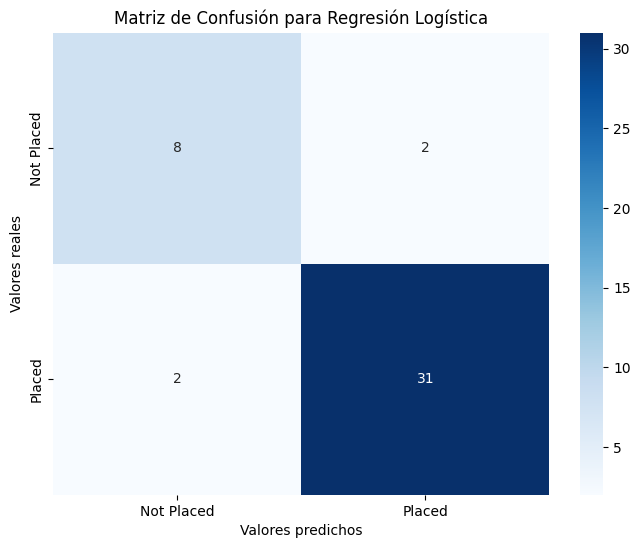

In [24]:
# Creamos matriz de confusión para regresión logística
conf_matrix_logistic = confusion_matrix(y_test, y_pred, labels=['Not Placed', 'Placed'])

# Configuramos y graficamos la matriz para regresión logística con otros colores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Matriz de Confusión para Regresión Logística')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()


La matriz de confusión nos muestra que el modelo predijo correctamente la colocación de 31 estudiantes y correctamente no coloca a 8 estudiantes. Sin embargo, predijo incorrectamente que 2 estudiantes no serían colocados (cuando sí lo fueron) y que 2 estudiantes serían colocados (cuando no lo fueron)




La curva ROC (Receiver Operating Characteristic) es una representación gráfica del rendimiento del modelo para diferentes umbrales de discriminación. El área bajo la curva (AUC) es una medida de la capacidad predictiva global del modelo.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


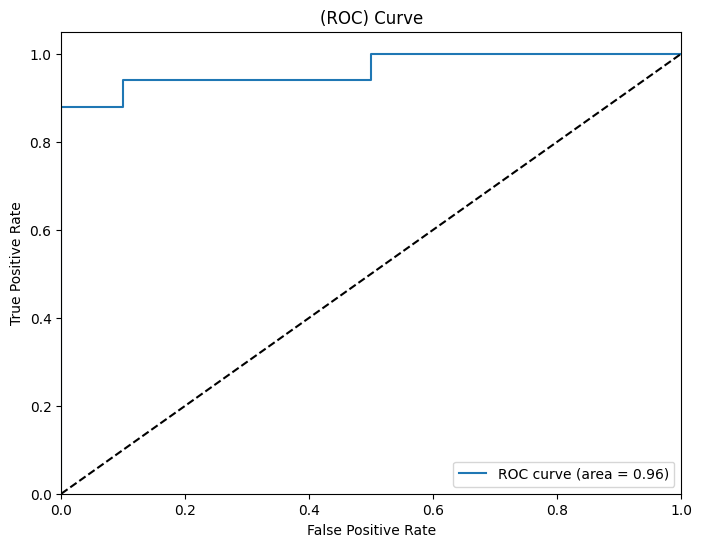


Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.80      0.80      0.80        10
      Placed       0.94      0.94      0.94        33

    accuracy                           0.91        43
   macro avg       0.87      0.87      0.87        43
weighted avg       0.91      0.91      0.91        43


ROC AUC: 0.9636363636363636


In [25]:

# Calcular probabilidades de predicción para la clase positiva
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Convertir 'Not Placed' a 0 y 'Placed' a 1 en y_test
y_test_numeric = y_test.map({'Not Placed': 0, 'Placed': 1})

# Calcular la tasa de verdaderos positivos (True Positive Rate) y la tasa de falsos positivos (False Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Mostrar otras métricas
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Mostrar el área bajo la curva (AUC)
print("\nROC AUC:", roc_auc)


Partiendo de la matriz de confusión previa, podemos calcular:

La sensibilidad (Recall) para la clase 'Placed':La sensibilidad es la proporción de casos positivos reales que fueron correctamente identificados por el modelo.Es útil para evaluar la capacidad del modelo para detectar correctamente los casos positivos(los estudiantes que serán colocados).

Sensibilidad = TP/TP + FN = 31/31 + 2 = 0.94

La Especificidad para la clase 'Not Placed':La especificidad es la proporción de casos negativos reales (Not placed) que fueron correctamente identificados por el modelo.Es útil para evitar la clasificación incorrecta de casos negativos.

Especificidad = TN/TN + FP = 8/8 + 2 = 0.8 El modelo también tiene una buena especificidad, aunque no tan alta como la sensibilidad.

La curva ROC y el AUC de 0.96 confirman que el modelo tiene una buena capacidad para diferenciar entre los estudiantes que serán colocados y los que no. La forma de la curva ROC, con sus escalones significativos, indica que hay umbrales de decisión en los cuales el modelo incrementa notablemente su capacidad para predecir correctamente sin aumentar los errores significativamente. Esto es consistente con los bajos falsos positivos y falsos negativos observados en la matriz de confusión.

La alta sensibilidad y especificidad, junto con un AUC cercano a 1, sugiere que el modelo es robusto y efectivo para este tipo de predicción.

# 4. Cluster

Exploraremos cómo realizar un análisis de clustering utilizando el dataset de Colocación en el Campus. Este dataset contiene información sobre el posicionamiento de los estudiantes en el campus, incluyendo porcentajes de calificaciones, experiencia laboral y salario ofrecido por las corporaciones a los estudiantes.

El objetivo de este análisis es agrupar a los estudiantes en diferentes categorías en función de sus características y salario ofrecido. Utilizaremos el algoritmo de K-Means y el clustering jerárquico aglomerativo para realizar este análisis.

## **Conceptos Clave**

**Clustering:** Es una técnica de aprendizaje no supervisado que agrupa objetos similares en grupos llamados "clusters". Los objetos dentro de un mismo cluster son más similares entre sí que con los objetos de otros clusters.

**K-Means:** Es un algoritmo de clustering que agrupa los datos en k clusters, donde k es un número predefinido. El algoritmo asigna cada punto de datos al cluster más cercano en función de la distancia euclidiana.

**Clustering Jerárquico Aglomerado:** Es un enfoque de clustering que construye una jerarquía de clusters. Comienza con cada punto de datos como un cluster individual y luego fusiona los clusters más cercanos hasta que todos los puntos de datos estén en un solo cluster.

**PCA (Análisis de Componentes Principales):** Es una técnica de reducción de dimensionalidad que se utiliza para visualizar datos de alta dimensionalidad en un espacio de menor dimensión. PCA encuentra las direcciones principales de variación en los datos y las proyecta en un nuevo espacio.

**1. Importanción de librerias y ánalisis del Dataframe**

In [26]:
# Examinar el DataFrame
print(datos.head())
print(datos.info())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status         salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.000000  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.000000  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.000000  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed  288655.405405  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**2. Seleccionar características relevantes:** En esta sección, seleccionamos las características relevantes para el análisis de clustering. Escogemos las características 'salary', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p' y 'mba_p'.

In [27]:
# Seleccionar características relevantes (incluyendo 'salary' y otras)
features = ['salary', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  # Ejemplo de características
datos_selected = datos[features].fillna(0)  # Rellenar los valores nulos con 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**3. Normalizar los datos seleccionados:** Antes de aplicar el algoritmo de clustering, es importante normalizar los datos para asegurarse de que todas las características tengan la misma escala. En esta sección, utilizamos el objeto StandardScaler de scikit-learn para normalizar los datos seleccionados.


In [28]:
# Normalizar los datos seleccionados
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos_selected)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**4. Método del codo:** El método del codo es una técnica utilizada para determinar el número óptimo de clusters en un análisis de clustering. En esta sección, utilizamos el método del codo para encontrar el número óptimo de clusters en función de la suma de los cuadrados dentro del cluster (WCSS).
Visualizamos el gráfico del método del codo para determinar el número óptimo de clusters..

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

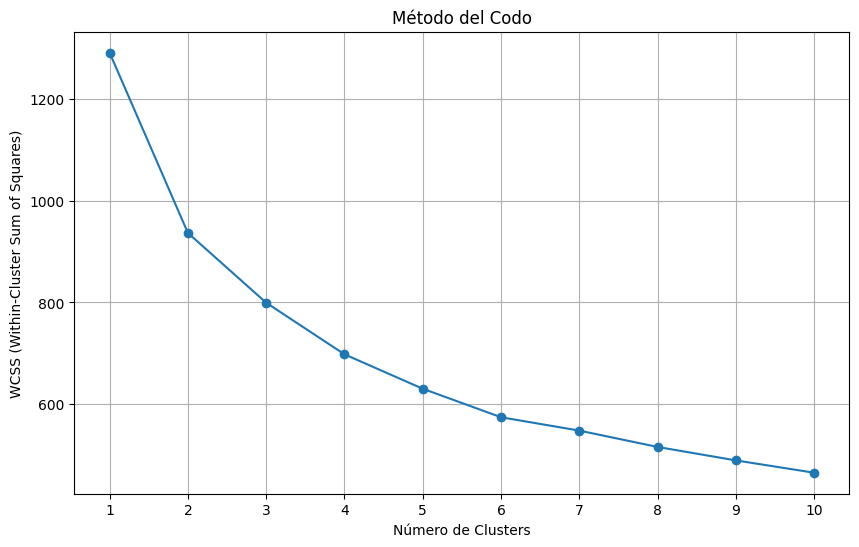

In [29]:
# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(datos_scaled)
    wcss.append(kmeans.inertia_)

# Visualizar el gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

El gráfico muestra la relación entre el número de clusters y el WCSS.
en este caso hemos decidido que el rasngo óptimo de k está entre 3 y 4, sin embargo cogeremos k=3 ya que priorizamos el menor número de clusters.

**5. Aplicar PCA para reducir los datos a dos componentes:** En esta sección, aplicamos el análisis de componentes principales (PCA) para reducir los datos a dos componentes principales. Esto nos permite visualizar los datos en un espacio de menor dimensión.

In [30]:
# Aplicar PCA para reducir los datos a dos componentes
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_scaled)

# Convertir las componentes principales a un DataFrame
pca_df = pd.DataFrame(data=datos_pca, columns=['PCA1', 'PCA2'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**6. Obtener las cargas de las variables:** En esta sección, obtenemos las cargas de las variables para cada componente principal. Las cargas de las variables indican la contribución de cada variable al componente principal.
Lo que nos muestran es que la componente 1 relaciona directamente con lo referente a los estudios y formación ,mientras que la componente 2 se relaciona con el salario y la empleabilidad.
Para hacerlo más visual empleamos un grafico que indique su representación en cada componente indicando la componente 1 con el color azul y la componente 2 con el naranja.


               PC1       PC2
salary    0.150032  0.895222
ssc_p     0.798144 -0.183022
hsc_p     0.745156 -0.111577
degree_p  0.762473 -0.245404
etest_p   0.493009  0.404923
mba_p     0.678968  0.121348


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x600 with 0 Axes>

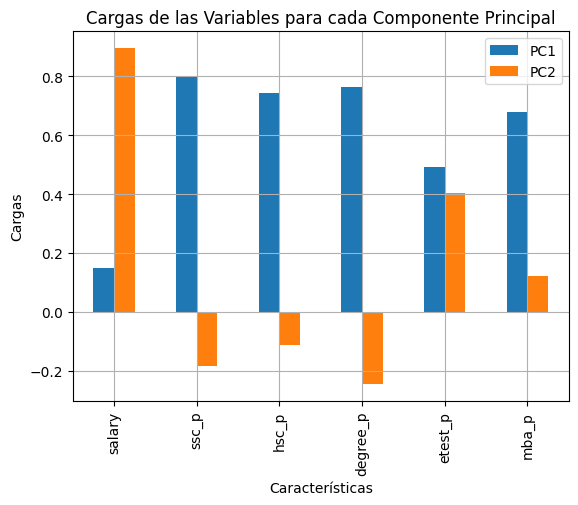

In [31]:
# Obtener las cargas de las variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para las cargas
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features)

# Mostrar las cargas de las variables
print(loadings_df)

# Visualizar las cargas de las variables en un gráfico de barras
plt.figure(figsize=(10, 6))
loadings_df.plot(kind='bar')
plt.title('Cargas de las Variables para cada Componente Principal')
plt.xlabel('Características')
plt.ylabel('Cargas')
plt.grid(True)
plt.show()


### Análisis de las cargas de las variables.

**PCA1**:

**Variables con mayor carga positiva**: salary, ssc_p (secondary school percentage), hsc_p (higher secondary school percentage), degree_p (degree percentage), y etest_p (employability test percentage). Esto sugiere que PCA1 captura principalmente una variación asociada con el rendimiento académico y el salario. Es decir, estudiantes con altos porcentajes en educación secundaria, educación superior y pruebas de empleabilidad tienden a tener valores altos en PCA1.

**PCA2**:

**Variables con mayor carga positiva:** salary y mba_p (MBA percentage). PCA2 parece ser influenciada positivamente por el salario y el rendimiento en el programa MBA, lo que puede reflejar diferencias en el tipo de educación o habilidades de negocios adquiridas.

**Variables con carga negativa significativa:** degree_p y hsc_p. Esto podría indicar que un mejor desempeño en la educación formal (secundaria y universitaria) no necesariamente se correlaciona con lo que PCA2 está capturando, que podría estar más relacionado con habilidades o calificaciones post-universitarias como un MBA.

**7. Aplicar K-Means clustering con k=3:** En esta sección, aplicamos el algoritmo de K-Means para agrupar los datos en 3 clusters. El número de clusters se determinó utilizando el método del codo, que graficamos anteriormente.


In [32]:
# Aplicar K-Means clustering con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(datos_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**8.Visualizar los clusters en el espacio PCA:** En esta sección, visualizamos los clusters en el espacio de las dos componentes principales utilizando un gráfico de dispersión. Cada punto de datos se colorea según el cluster al que pertenece.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


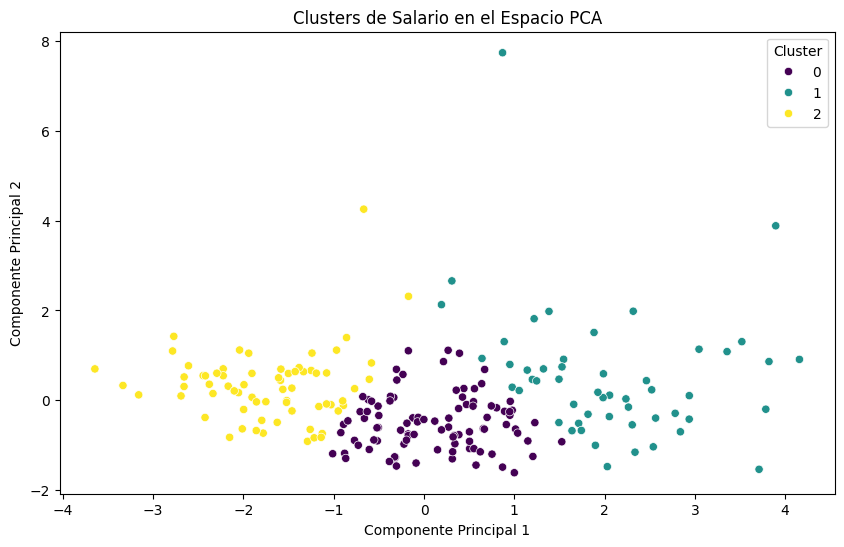

In [33]:
# Visualizar los clusters en el espacio PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clusters de Salario en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### Análisis de los Clusters

**Distribución y Características de los Clústeres:**

**Cluster 0 (Azul):** Este clúster parece estar compuesto por puntos que están en su mayoría agrupados hacia el centro y el lado derecho del gráfico. Los puntos aquí están distribuidos de manera más compacta, lo que puede indicar que los estudiantes en este grupo tienen características similares en términos de las variables representadas por las dos principales componentes de PCA.

**Cluster 1 (Púrpura):** Este cluster se dispersa más hacia el lado izquierdo y abarca la región central del gráfico. El grado de dispersión es más amplio comparado con el Cluster 0, sugiriendo una mayor variabilidad dentro del cluster respecto a las características analizadas.

**Cluster 2 (Amarillo):** Contiene menos puntos que los otros dos y se localiza principalmente en la parte superior del gráfico. Los puntos aquí están más dispersos y, en general, están separados de los otros dos clusters. Esto podría indicar que los estudiantes en este cluster tienen características muy distintas y posiblemente más deseables (como mayores salarios o mejores calificaciones) comparado con los otros dos grupos.


**Implicaciones de los Resultados:**

Los estudiantes del Clúster 2, aunque parezca contradictorio por estar en negativo, en  PCA, tanto valores negativos como positivos en cualquier componente simplemente reflejan la posición relativa de los datos respecto a la media en esa dirección específica de máxima varianza. Un valor negativo en PCA1 no implica un resultado negativo en términos de salario u otra métrica de éxito. Por eso, podrían estar recibiendo ofertas de salario significativamente más altas, lo que los hace distintos del resto de los estudiantes. Esto puede ser un indicador de que poseen habilidades o experiencias más cotizadas.

El Clúster 1, al ser el más variado, sugiere que hay un amplio rango de características, lo que podría dificultar la creación de estrategias dirigidas específicamente a este grupo sin un análisis más detallado para entender las subcategorías dentro del mismo.

El Clúster 0, siendo el más denso y uniformemente distribuido, podría representar un segmento de estudiantes con características promedio o típicas en comparación con el resto del dataset.

**9. Generar el dendrograma utilizando clustering jerárquico aglomerado:** En esta sección, generamos un dendrograma utilizando el clustering jerárquico aglomerativo. El dendrograma muestra la relación de similitud entre los datos y se utiliza para determinar el número óptimo de clusters.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


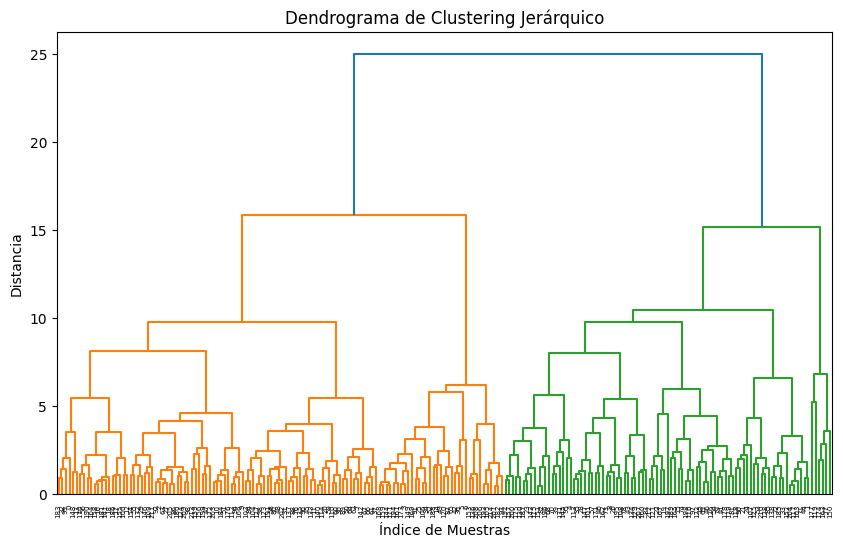

In [34]:
# Generar el dendrograma utilizando clustering jerárquico aglomerativo
linked = linkage(datos_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de Muestras')
plt.ylabel('Distancia')
plt.show()


### **Conclusión:**
Podemos observar que en la zona más positiva de la componente 1 se concentran más individuos con un rango alto en el tema salarial y salida laboral, lo que nos indica que existe una cierta relación entre estos aspectos. Sin embargo, el resultado esperado debería ser mucho más diferencial que el obtenido, siendo una influencia que no coge fuerza dada la hipótesis planteada inicialmente. Además, esto puede ser resultado de la menor representación de individuos dentro del rango considerado como preparados a nivel educacional, o cluster 2. Es importante destacar también que las variables asociadas con la universidad no muestran una carga significativa, sugiriendo que la influencia de la educación universitaria en estos aspectos es menor de lo esperado, lo cual podría requerir una revisión de las estrategias educativas y de la colocación laboral.